# 🔍 Telco Customer Churn Prediction 🚨

This project aims to predict whether a telecom customer is likely to churn or stay, using machine learning techniques. The dataset is class-imbalanced, making it a perfect candidate for using SMOTE, feature selection, and ensemble modeling.

**Objectives:**
- Predict customer churn accurately
- Use advanced preprocessing and ensemble voting
- Optimize with Optuna and evaluate results using classification metrics


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import warnings; warnings.filterwarnings('ignore')

## 📁 Dataset Overview

We begin by loading the Telco dataset and exploring its structure. This step helps identify missing values, datatypes, and categorical/numerical columns.


In [6]:
df = pd.read_csv("telco_data.csv")

In [7]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df = df.drop(columns={'customerID'})

In [10]:
df.shape

(7043, 20)

In [11]:
columns = df.columns

for i in columns :
    if i != 'customerID' :
        print(df[i].value_counts().iloc[0:40])
        print("---------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------------")
    

gender
Male      3555
Female    3488
Name: count, dtype: int64
---------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
---------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
---------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
---------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
tenure
1     613
72    362
2     238
3     200
4     176
71    170
5  

In [12]:
df['TotalCharges'].value_counts().iloc[0:40]

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
45.3       7
19.55      7
20.15      6
20.25      6
19.45      6
20.3       5
20.45      5
19.85      4
69.9       4
20.4       4
70.6       4
19.2       4
69.65      4
44         4
44.4       4
20.5       4
49.9       4
74.7       4
19.3       4
19.95      4
19.5       4
75.3       4
50.15      4
20.35      4
69.6       4
19.4       4
69.95      4
19.25      3
70.45      3
1284.2     3
69.25      3
74.3       3
20.9       3
220.45     3
Name: count, dtype: int64

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
for cols in df.columns :
    if df[cols].dtype == 'int64' :
        df[cols].astype('int32')
    if df[cols].dtype == 'float64' :
        df[cols].astype('float32')

In [18]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [19]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [20]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [21]:
from matplotlib import pyplot as plt

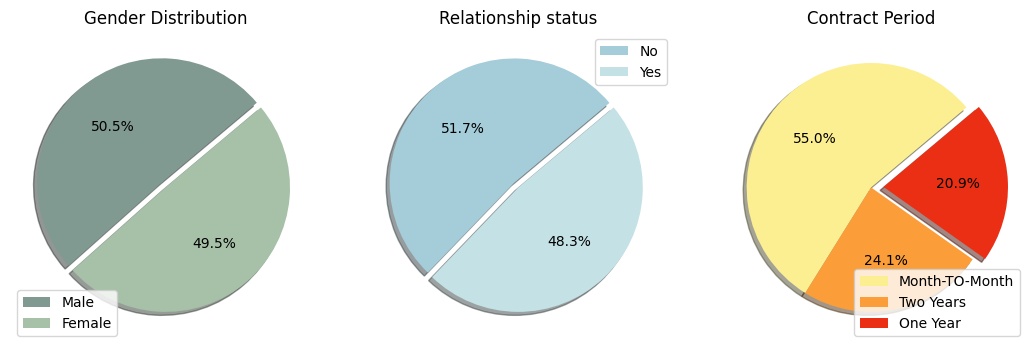

In [22]:
fig, axs = plt.subplots(1,3, figsize=(11, 9))

axs[0].pie(df['gender'].value_counts(), colors=['#819A91', '#A7C1A8'], startangle=40, explode=[0.05, 0], shadow=True, autopct='%1.1f%%')
axs[0].legend(labels=['Male', 'Female'])
axs[0].set_title('Gender Distribution')

axs[1].pie(df['Partner'].value_counts(), colors=['#A4CCD9', '#C4E1E6'], startangle=40, explode=[0.05, 0], shadow=True, autopct='%1.1f%%')
axs[1].legend(labels=['No', 'Yes'])
axs[1].set_title('Relationship status')

axs[2].pie(df['Contract'].value_counts(), colors=['#FCEF91', '#FB9E3A', '#EA2F14'], startangle=40, explode=[0, 0, 0.1], shadow=True, autopct='%1.1f%%')
axs[2].legend(labels=['Month-TO-Month', 'Two Years', 'One Year'])
axs[2].set_title('Contract Period')

plt.tight_layout(pad=3)
plt.show()

In [23]:
import seaborn as sns

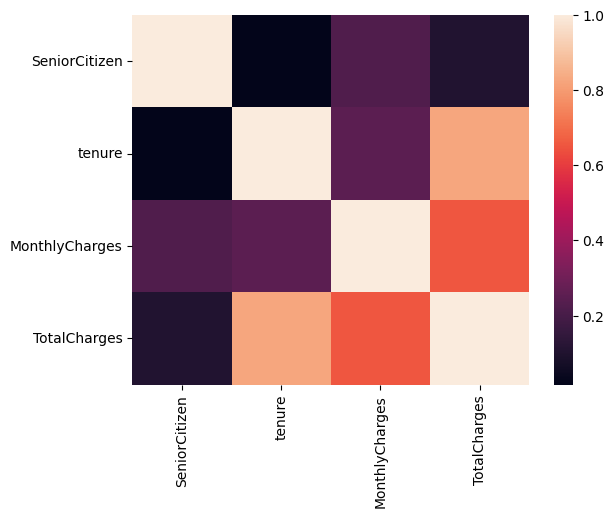

In [24]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [25]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 🧼 Data Preprocessing & Encoding

To prepare the dataset:
- Categorical columns are encoded using **BinaryEncoder** and **TargetEncoder**
- Numerical values are scaled using **StandardScaler**
- Missing values are handled appropriately

These transformations are essential for ML models to understand the data effectively.


In [27]:
from category_encoders import BinaryEncoder, TargetEncoder

In [28]:
be = BinaryEncoder(handle_missing='value', handle_unknown='value', drop_invariant=False)

In [29]:
te = TargetEncoder()

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [31]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [32]:
ss = StandardScaler()

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
simple = SimpleImputer(strategy='mean')

In [35]:
df['TotalCharges'] = simple.fit_transform(df[['TotalCharges']])

In [36]:
categorical_cols = []
num_cols = []
bin_num_col = []

not_col = ['customerID', 'Churn']

for category in df.columns :
    if category not in not_col :
        if df[category].dtype == 'object':
            if df[category].nunique() == 2 :
                bin_num_col.append(category)
            else :
                categorical_cols.append(category)
        else :
            num_cols.append(category)

print('------------Categorical columns: \n', categorical_cols, '\n\n')
print('-----------------Numeric columns for standard scale: \n', num_cols)
print('-----------------categorical columns for Binary encoding: \n', bin_num_col)

------------Categorical columns: 
 ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'] 


-----------------Numeric columns for standard scale: 
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
-----------------categorical columns for Binary encoding: 
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


## 🔗 Feature Relationships: Pairplot

Let’s visualize the relationships between some key features using `seaborn.pairplot()`. This helps us understand:
- Which features are correlated
- How churn (target variable) separates clusters


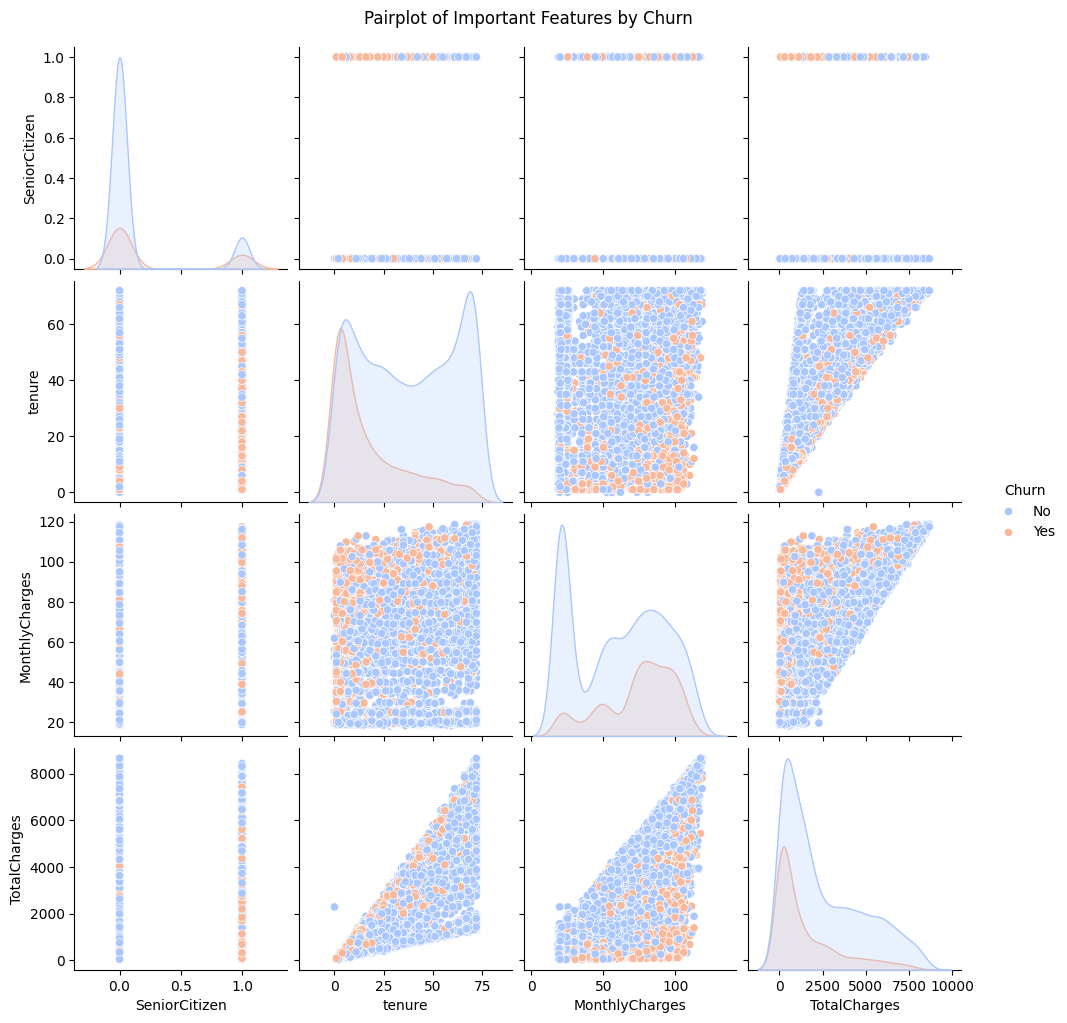

In [38]:
num_cols.append('Churn')

sns.pairplot(df[num_cols], hue="Churn", palette='coolwarm')
plt.suptitle("Pairplot of Important Features by Churn", y=1.02)
plt.show()

num_cols.remove('Churn')

In [39]:
from sklearn.compose import make_column_transformer

In [40]:
transform = make_column_transformer(
    (be, bin_num_col),
    (ss, num_cols)
)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(random_state=42)

In [43]:
X = df.drop(columns={'Churn'})

In [44]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)
y = df['Churn']

## ✂️ Train-Test Split

We split the data into training and testing sets to evaluate model performance fairly. The split ensures the target label distribution is preserved.


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [48]:
X_train_te = X_train.copy()
X_test_te = X_test.copy()

X_train_te[categorical_cols] = te.fit_transform(X_train[categorical_cols], y_train)
X_test_te[categorical_cols] = te.transform(X_test[categorical_cols])

## ⚖️ Balancing Classes using SMOTE

Churn prediction is an imbalanced classification problem. We use **SMOTE (Synthetic Minority Over-sampling Technique)** to oversample the minority class in the training data.


In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smt = SMOTE(random_state=42)

In [52]:
from imblearn.pipeline import Pipeline

In [53]:
pipe = Pipeline([
    ('preprocessor', transform),
    ('smote', smt),
    ('classifier', rfc)
])

In [54]:
pipe.fit(X_train_te, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
pre_1 = pipe.predict(X_test_te)

In [57]:
cm_1 = confusion_matrix(y_test, pre_1)

In [58]:
cr_1 = classification_report(y_test, pre_1)

In [59]:
print(cm_1)

[[1227  312]
 [ 240  334]]


In [60]:
print(cr_1)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1539
           1       0.52      0.58      0.55       574

    accuracy                           0.74      2113
   macro avg       0.68      0.69      0.68      2113
weighted avg       0.75      0.74      0.74      2113



In [61]:
X_train_te_new = X_train_te.copy()
X_test_te_new = X_test_te.copy()

bin_encoded_train = be.fit_transform(X_train_te_new[bin_num_col])
bin_encoded_test = be.transform(X_test_te_new[bin_num_col])

# Converting to DataFrame and set proper column names
bin_encoded_train_df = pd.DataFrame(bin_encoded_train, columns=be.get_feature_names_out(bin_num_col), index=X_train_te_new.index)
bin_encoded_test_df = pd.DataFrame(bin_encoded_test, columns=be.get_feature_names_out(bin_num_col), index=X_test_te_new.index)

# Droping original binary columns
X_train_te_new.drop(columns=bin_num_col, inplace=True)
X_test_te_new.drop(columns=bin_num_col, inplace=True)

# Concatenate column's
X_train_te_new = pd.concat([X_train_te_new, bin_encoded_train_df], axis=1)
X_test_te_new = pd.concat([X_test_te_new, bin_encoded_test_df], axis=1)


In [62]:
X_train_te_new[num_cols] = ss.fit_transform(X_train_te_new[num_cols])
X_train_te_new[num_cols] = ss.fit_transform(X_train_te_new[num_cols])

In [63]:
smote_X_train, smote_y_train = smt.fit_resample(X_train_te_new, y_train)
smote_X_test, smote_y_test = smt.fit_resample(X_test_te_new, y_test)

## 🎯 Hyperparameter Tuning using Optuna

Optuna is used to fine-tune model hyperparameters efficiently. This helps improve accuracy and generalization by searching the optimal parameter space.


In [65]:
import optuna

In [66]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [67]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [68]:
from xgboost import XGBClassifier

In [69]:
from lightgbm import LGBMClassifier

In [70]:
from sklearn.ensemble import VotingClassifier

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
def objective(trial):
    # Random Forest 
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 100, 500, step=50)
    rf_max_depth = trial.suggest_int('rf_max_depth', 3, 20)

    clf_rf = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        random_state=42,
        n_jobs=-1
    )

    # XGBoost 
    xgb_n_estimators = trial.suggest_int('xgb_n_estimators', 100, 500, step=50)
    xgb_learning_rate = trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True)
    xgb_max_depth = trial.suggest_int('xgb_max_depth', 3, 20)
    xgb_subsample = trial.suggest_float('xgb_subsample', 0.5, 1.0)
    xgb_colsample_bytree = trial.suggest_float('xgb_colsample_bytree', 0.5, 1.0)
    xgb_gamma = trial.suggest_float('xgb_gamma', 0, 5)
    xgb_reg_lambda = trial.suggest_float('xgb_reg_lambda', 0.0, 5.0)
    xgb_reg_alpha = trial.suggest_float('xgb_reg_alpha', 0.0, 5.0)
    xgb_scale_pos_weight = trial.suggest_float('xgb_scale_pos_weight', 1.0, 10.0)

    clf_xgb = XGBClassifier(
        n_estimators=xgb_n_estimators,
        learning_rate=xgb_learning_rate,
        max_depth=xgb_max_depth,
        subsample=xgb_subsample,
        colsample_bytree=xgb_colsample_bytree,
        gamma=xgb_gamma,
        reg_lambda=xgb_reg_lambda,
        reg_alpha=xgb_reg_alpha,
        scale_pos_weight=xgb_scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )

    # LightGBM 
    lgb_n_estimators = trial.suggest_int('lgb_n_estimators', 100, 500, step=50)
    lgb_learning_rate = trial.suggest_float('lgb_learning_rate', 0.01, 0.3, log=True)
    lgb_max_depth = trial.suggest_int('lgb_max_depth', 3, 20)
    lgb_num_leaves = trial.suggest_int('lgb_num_leaves', 15, 150, step=5)
    lgb_min_child_samples = trial.suggest_int('lgb_min_child_samples', 10, 100, step=10)

    clf_lgb = LGBMClassifier(
        n_estimators=lgb_n_estimators,
        learning_rate=lgb_learning_rate,
        max_depth=lgb_max_depth,
        num_leaves=lgb_num_leaves,
        min_child_samples=lgb_min_child_samples,
        random_state=42,
        n_jobs=-1
    )

    # Logistic Regression
    lr_C = trial.suggest_float('lr_C', 0.001, 10.0, log=True)
    lr_penalty = trial.suggest_categorical('lr_penalty', ['l2'])
    lr_solver = trial.suggest_categorical('lr_solver', ['liblinear', 'lbfgs'])


    clf_lr = LogisticRegression(
        C=lr_C,
        penalty=lr_penalty,
        solver=lr_solver,
        random_state=42,
        max_iter=1000
    )

    # Combining multiple classifiers for best result
    voting = VotingClassifier(
        estimators=[
            ('rf', clf_rf),
            ('xgb', clf_xgb),
            ('lgb', clf_lgb),
            ('lr', clf_lr),
        ],
        voting='soft',
        n_jobs=-1
    )

    # Cross-validation score
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(voting, smote_X_train, smote_y_train, cv=skf, scoring='f1', n_jobs=1)
    
    if trial.should_prune() :
        raise optuna.TrialPruned()

    return score.mean()


In [73]:
pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=1)
study = optuna.create_study(direction='maximize', pruner=pruner)
study.optimize(objective, n_trials=50)

In [74]:
print("Best params: ", study.best_params)
print("Best value: ", study.best_value)

Best params:  {'rf_n_estimators': 100, 'rf_max_depth': 20, 'xgb_n_estimators': 500, 'xgb_learning_rate': 0.01935048079844335, 'xgb_max_depth': 13, 'xgb_subsample': 0.5957111936939611, 'xgb_colsample_bytree': 0.9576359911057872, 'xgb_gamma': 4.189923804906229, 'xgb_reg_lambda': 0.5841082012105471, 'xgb_reg_alpha': 1.327942900688992, 'xgb_scale_pos_weight': 1.3638902515937996, 'lgb_n_estimators': 250, 'lgb_learning_rate': 0.05984834193192157, 'lgb_max_depth': 19, 'lgb_num_leaves': 40, 'lgb_min_child_samples': 20, 'lr_C': 0.0019091150162259265, 'lr_penalty': 'l2', 'lr_solver': 'liblinear'}
Best value:  0.8555619106816433


In [75]:
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=17,
    random_state=42,
    n_jobs=-1
)

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05711522509359269,
    max_depth=20,
    subsample=0.8400305135748165,
    colsample_bytree=0.5058880268128743,
    gamma=2.893128125227293,
    reg_lambda=2.316076702593192,
    reg_alpha=1.2857080854092322,
    scale_pos_weight=1.004982817889463,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.04042560235052731,
    max_depth=12,
    num_leaves=60,
    min_child_samples=30,
    random_state=42,
    n_jobs=-1
)

lr = LogisticRegression(
    C=0.012664730646344463,
    penalty='l2',
    solver='lbfgs',
    random_state=42
)

# Voting classifier (soft voting gives better probability-based results)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rfc),
        ('xgb', xgb),
        ('lgb', lgbm),
        ('lr', lr)
    ],
    voting='soft',
    n_jobs=-1
)

In [76]:
voting_clf.fit(smote_X_train, smote_y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=17, n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5058880268128743,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                             ('lgb',
                              LGBMClassifier(learning_rate=0.04042560235052731,
                                             max_depth=12, min_child_samples=30,
                                             n_estimators=300, n_jobs=-1,
                                             num_leaves=60, random_state=42)),
                             ('lr',
                              LogisticRegression(C=0.012664730646344463,
                                                 random_state=42))],
                 n_jobs=-1, voting='soft')

In [77]:
pre_2 = voting_clf.predict(smote_X_test)

In [78]:
cm_2 = confusion_matrix(smote_y_test, pre_2)
cr_2 = classification_report(smote_y_test, pre_2)

In [79]:
print(cm_2)

[[1504   35]
 [ 531 1008]]


In [80]:
print(cr_2)

              precision    recall  f1-score   support

           0       0.74      0.98      0.84      1539
           1       0.97      0.65      0.78      1539

    accuracy                           0.82      3078
   macro avg       0.85      0.82      0.81      3078
weighted avg       0.85      0.82      0.81      3078



In [81]:
rfc_smf = RandomForestClassifier(random_state = 42)

In [82]:
rfc_smf.fit(smote_X_train, smote_y_train)

RandomForestClassifier(random_state=42)

## 🧠 Feature Selection with SelectFromModel

We apply feature selection to reduce dimensionality and improve model performance. A `VotingClassifier` is used to identify the most important features via `SelectFromModel`.


In [84]:
from sklearn.feature_selection import SelectFromModel

In [85]:
sfm = SelectFromModel(rfc_smf, threshold='median')

In [86]:
sfm.fit(smote_X_train, smote_y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [87]:
# Step 1: Get selected features mask
selected_mask = sfm.get_support()

# Step 2: Use it to fetch actual column names from original DataFrame
selected_features = smote_X_train.columns[selected_mask]

# Step 3: Transform data
X_train_new_arr = sfm.transform(smote_X_train)
X_test_new_arr = sfm.transform(smote_X_test)

# Step 4: Wrap with DataFrame
X_train_new = pd.DataFrame(X_train_new_arr, columns=selected_features, index=smote_X_train.index)
X_test_new = pd.DataFrame(X_test_new_arr, columns=selected_features, index=smote_X_test.index)


In [88]:
print(selected_features)

Index(['tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [89]:
final_pipe = Pipeline([
    ('voting', voting_clf)
])

In [90]:
final_pipe.fit(X_train_new, smote_y_train)

Pipeline(steps=[('voting',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(max_depth=17,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('xgb',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=0.5058880268128743,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric='lo...
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None, ...)),
                                              ('lgb',
                                               LGBMClassifier(learning_rate=0.04042560235052731,
                                                              max_depth=12,
                                                              min_child_samples=30,
                                                              n_estimators=300,
                                                              n_jobs=-1,
                                                              num_leaves=60,
                                                              random_state=42)),
                                              ('lr',
                                               LogisticRegression(C=0.012664730646344463,
                                                                  random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [91]:
pre_3 = final_pipe.predict(X_test_new)

## 📊 Final Model Evaluation

The final model is evaluated using metrics like:
- Accuracy
- Precision
- Recall
- F1-score

The confusion matrix and classification report offer a detailed view of how well the model performs across both classes (churn and non-churn).


In [93]:
cm_3 = confusion_matrix(smote_y_test, pre_3)
cr_3 = classification_report(smote_y_test, pre_3)

In [94]:
print(cm_3)

[[1485   54]
 [ 506 1033]]


In [95]:
print(cr_3)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1539
           1       0.95      0.67      0.79      1539

    accuracy                           0.82      3078
   macro avg       0.85      0.82      0.81      3078
weighted avg       0.85      0.82      0.81      3078



In [96]:
import joblib

In [97]:
joblib.dump(final_pipe, 'trained_model.pkl')
joblib.dump(te, 'T_encoder.pkl')
joblib.dump(be, 'B_encoder.pkl')
joblib.dump(ss, 'S_scaler.pkl')
joblib.dump(selected_features, 'selected_columns.pkl')

['selected_columns.pkl']

## ✅ Conclusion

- Achieved **~82% accuracy and balanced precision/recall**
- Used **SMOTE** to handle class imbalance
- Employed **feature selection** to improve generalization
- Combined powerful models in a **VotingClassifier**
- Tuned using **Optuna**, showing professional-level ML practices
